In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers=pd.read_csv('/content/drive/MyDrive/datasets/Customers.csv');
products=pd.read_csv('/content/drive/MyDrive/datasets/Products.csv');
transactions=pd.read_csv('/content/drive/MyDrive/datasets/Transactions.csv');

In [5]:
print("customers")
print(customers.head())
print("products")
print(products.head())
print("transactions")
print(transactions.head())

customers
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
products
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
transactions
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-2

In [17]:
print(customers.size);
print(products.size);
print(transactions.size);


800
400
7000


In [13]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values
print("Missing values in Customers:")
print(check_missing_values(customers))
print("Missing values in Products:")
print(check_missing_values(products))
print("Missing values in Transactions:")
print(check_missing_values(transactions))

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [19]:
print(customers.describe)


<bound method NDFrame.describe of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>


In [20]:
print(products.describe)


<bound method NDFrame.describe of    ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44.12
3       P004            BookWorld Rug   Home Decor   95.69
4       P005          TechPro T-Shirt     Clothing  429.31
..       ...                      ...          ...     ...
95      P096     SoundWave Headphones  Electronics  307.47
96      P097       BookWorld Cookbook        Books  319.34
97      P098         SoundWave Laptop  Electronics  299.93
98      P099   SoundWave Mystery Book        Books  354.29
99      P100        HomeSense Sweater     Clothing  126.34

[100 rows x 4 columns]>


In [21]:
print(transactions.describe)

<bound method NDFrame.describe of     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price  
0        300.68  300.68  
1        300.68  300.68  
2        30

In [22]:
merged_data=transactions.merge(customers,on='CustomerID').merge(products,on='ProductID')

In [24]:
print("Merged data:")
print(merged_data.head())

Merged data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Blue

In [34]:
top_customers = merged_data.groupby(["CustomerID", "CustomerName"])["TotalValue"].sum().sort_values(ascending=False).head(15)
print("Top 15 customers by total transaction :")
top_customers


Top 15 customers by total transaction :


,,TotalValue
CustomerID,CustomerName,
C0141,Paul Parsons,10673.87
C0054,Bruce Rhodes,8040.39
C0065,Gerald Hines,7663.70
C0156,William Adams,7634.45
C0082,Aimee Taylor,7572.91
C0188,Anna Ball,7111.32
C0059,Mrs. Kimberly Wright,7073.28
C0028,Jennifer Pena,6819.57
C0099,Rodney Eaton,6715.72


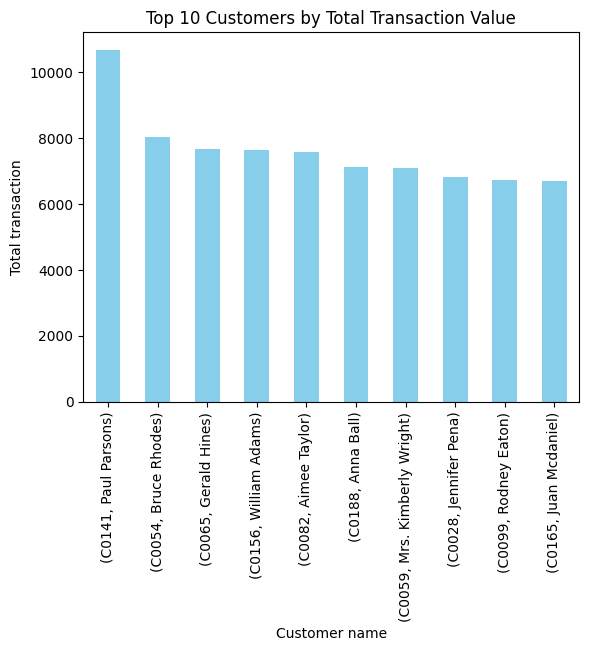

In [38]:
top_customers.plot(kind="bar", title="Top 10 Customers by Total Transaction Value", color="skyblue")
plt.xlabel("Customer name")
plt.ylabel("Total transaction")
plt.xticks(rotation=90)
plt.show()

In [40]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Sales trend over time:")
print(sales_trend)

Sales trend over time:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


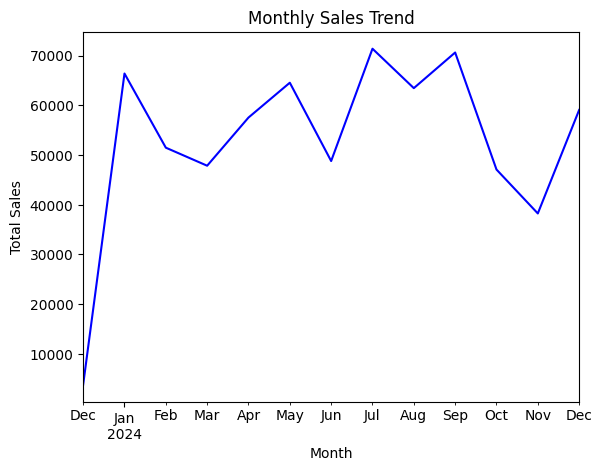

In [43]:
sales_trend.plot(title="Monthly Sales Trend", color="blue")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [44]:
sales_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Total Sales by Region:")
print(sales_by_region)

Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


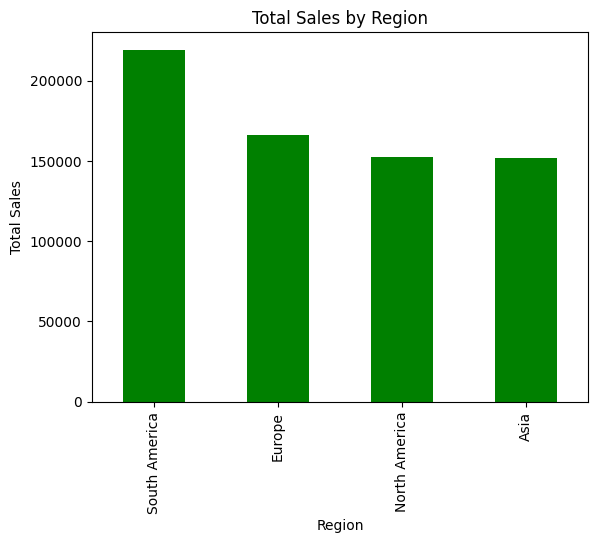

In [46]:
sales_by_region.plot(kind="bar", title="Total Sales by Region", color="green")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [47]:
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products:")
print(top_products)

Top 10 Selling Products:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


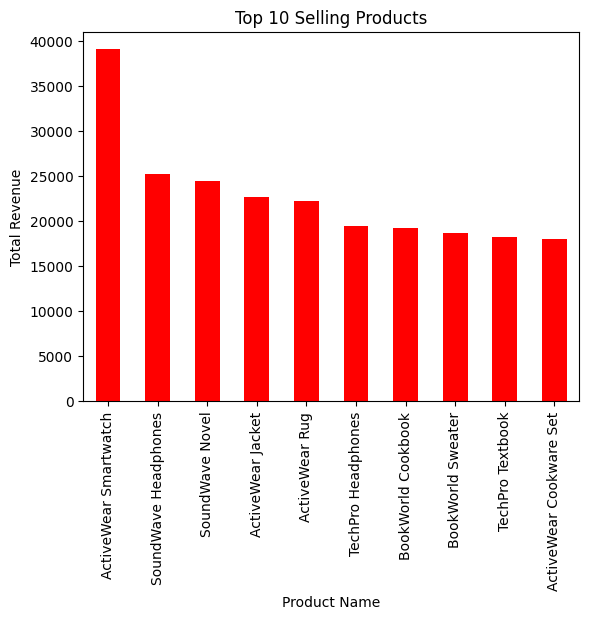

In [48]:
top_products.plot(kind="bar", title="Top 10 Selling Products", color="red")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()